# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Google Play Store Apps Data Analysis   </div>

## Project Overview
This project analyzes a dataset of Google Play Store applications to uncover key insights about app ratings, reviews, pricing, popularity, and compatibility. The dataset provides valuable information about various app attributes, such as category, type (free or paid), number of installs, user ratings, content ratings, and required Android versions. By exploring these aspects, we aim to identify patterns and trends that can help developers, businesses, and users make informed decisions.

## Dataset Description

The dataset, sourced from Kaggle, contains over 10,000 app records with the following key attributes:

- **App Name** – The title of the application.

- **Category** – The app's category (e.g., Games, Business, Education).

- **Rating** – User ratings (0–5 scale).

- **Reviews** – The number of reviews submitted by users.

- **Size** – The app size in megabytes (MB) or kilobytes (KB).

- **Installs** – The number of times the app has been downloaded.

- **Type** – Whether the app is Free or Paid.

- **Price** – The cost of the app (if paid).

- **Content Rating** – The recommended age group for users (e.g., Everyone, Teen, Mature 17+).

- **Genres** – Additional classification tags for the app.

- **Last Updated** – The last modification date of the app.

- **Android Version** – The minimum Android version required to run the app.

# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   Questions   </div>

- What is the most expensive app on the store.
- Which Genre has more apps.
- What is the average size of the free apps & paid apps.
- What is the 5 top expenisve apps that has rate of 5.
- How many apps that has more than 50K reviews.
- What is the average price of the apps for each genre with each installs numbers.
- How many apps have rating > 4.7 and what is thier avg price.
- How much google earned from the 5,000,000+ installed apps
- What is the max and min size for free and paid apps.
- is there a correlation between rating, Reviews, Size with the price of the app
- How many apps for each type for each content reading.
- How many apps that can work on android version 4

# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Import necessary libraries  </div>



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Data Overview and Preprocessing </div>



In [57]:
df = pd.read_csv('googleplaystore.csv')

In [59]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [63]:
# check duplicated value 
df.duplicated().sum()

483

In [65]:
# Drop duplicated values
df.drop_duplicates(inplace = True)

In [67]:
# Reset index 
df.reset_index(drop = True , inplace = True)

In [69]:
df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [71]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [73]:
# display 'nuique' , 'null' , 'persentage of null' and the 'types'

print('shape:')
print(df.shape)

tabela = pd.DataFrame({
    'nunique':df.nunique(),
    'Null':df.isna().sum(),
    'Null per%':df.isna().sum() *100/df.shape[0],
    'Types':df.dtypes.values
})
display(tabela)

shape:
(10358, 13)


,nunique,Null,Null per%,Types
App,9660,0,0.000000,object
Category,34,0,0.000000,object
Rating,40,1465,14.143657,float64
Reviews,6002,0,0.000000,object
Size,462,0,0.000000,object
Installs,22,0,0.000000,object
Type,3,1,0.009654,object
Price,93,0,0.000000,object
Content Rating,6,1,0.009654,object
Genres,120,0,0.000000,object


# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Exploratory Data Analysis (EDA)  </div>



We can perform univariate analysis on these columns based on their datatype:

For numerical data, we can use a histogram to visualize the data distribution. The number of bins should be chosen appropriately to represent the data well.

For categorical data, we can use a bar plot to visualize the frequency of each category.

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Category    </div>

In [78]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [80]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [81]:
df.drop([9990], axis=0, inplace=True)

In [84]:
# Reset index 
df.reset_index(drop = True , inplace = True)

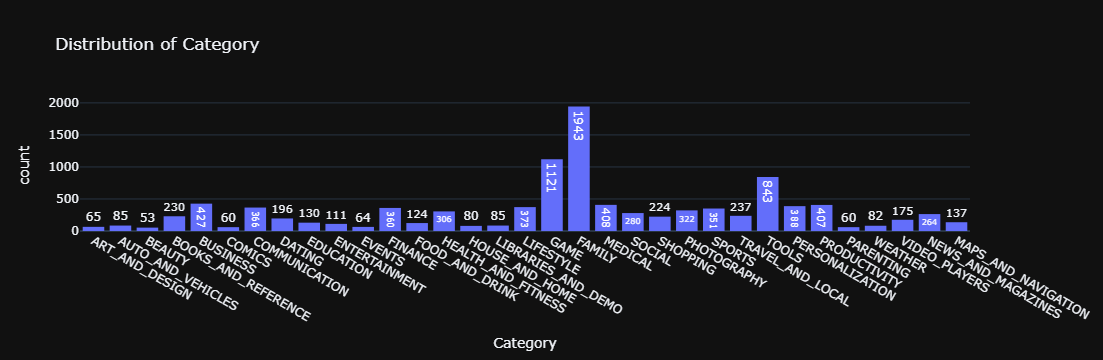

In [86]:
#  histogram of 'Category'
fig = px.histogram(data_frame=df , x = "Category" , text_auto=True ,
                   title= 'Distribution of Category' , template='plotly_dark')
fig.show()

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Rating    </div>

In [88]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [91]:
df['Rating'].isna().sum()

1465

In [93]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

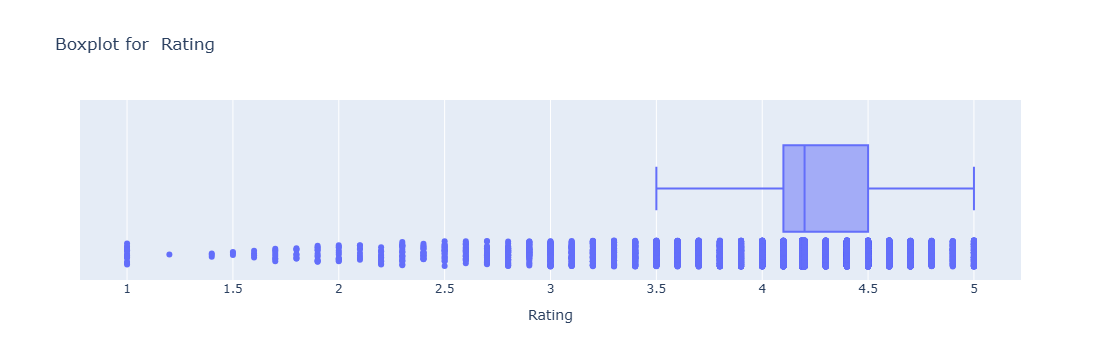

In [95]:
# Rating Boxplot
fig_Rating = px.box(df, x='Rating', title="Boxplot for  Rating", points="all")
fig_Rating.show()

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix revies    </div>

In [97]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [98]:
for i in df['Reviews'].unique():
    print(i)

159
967
87510
215644
167
178
36815
13791
121
13880
8788
44829
4326
1518
55
3632
27
194216
224399
450
654
7699
61
118
192
20260
203
136
223
1120
227
5035
1015
353
564
8145
36639
158
591
117
176
295221
2206
26
174531
1070
85
845
367
1598
284
17057
129
542
10479
805
1403
3971
534
7774
38846
2431
6090
295
190
40211
356
52530
116986
1379
271920
736
7021
197
737
3574
994
197136
142
15168
2155
138
5414
21777
348
250
13372
7880
3617
4806
65786
31433
5097
1754
2680
1288
18900
49790
1150
1739
32090
2225
4369
8572
964
42050
104
17934
601
36
187
182
30
134
74
113715
3595
9315
75
38
26834
119
2277
2280
184
9
77
35
364
18
473
66
3871
257
62
2914724
1857
4478
577550
814080
246315
454060
155446
418
22486
203130
1435
116507
1433233
90468
860
363934
87873
17506
1862
2084
47303
19080
161
85842
7831
91615
4620
21336
26875
1778
2709
64513
8342
527
1322
1680
2739
1065
233757
2
51269
30105
156
114
341157
16129
674730
1254730
85185
32584
217730
70991
1002861
16589
148945
4458
62272
8941
46353
1279184
88073
67

In [99]:
df['Reviews'] = pd.to_numeric(df['Reviews'] , errors = 'coerce')

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Size    </div>

In [105]:
df['Size'].value_counts()

Size
Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [107]:
for i in df['Size'].unique() :
    print(i)
        

19M
14M
8.7M
25M
2.8M
5.6M
29M
33M
3.1M
28M
12M
20M
21M
37M
2.7M
5.5M
17M
39M
31M
4.2M
7.0M
23M
6.0M
6.1M
4.6M
9.2M
5.2M
11M
24M
Varies with device
9.4M
15M
10M
1.2M
26M
8.0M
7.9M
56M
57M
35M
54M
201k
3.6M
5.7M
8.6M
2.4M
27M
2.5M
16M
3.4M
8.9M
3.9M
2.9M
38M
32M
5.4M
18M
1.1M
2.2M
4.5M
9.8M
52M
9.0M
6.7M
30M
2.6M
7.1M
3.7M
22M
7.4M
6.4M
3.2M
8.2M
9.9M
4.9M
9.5M
5.0M
5.9M
13M
73M
6.8M
3.5M
4.0M
2.3M
7.2M
2.1M
42M
7.3M
9.1M
55M
23k
6.5M
1.5M
7.5M
51M
41M
48M
8.5M
46M
8.3M
4.3M
4.7M
3.3M
40M
7.8M
8.8M
6.6M
5.1M
61M
66M
79k
8.4M
118k
44M
695k
1.6M
6.2M
18k
53M
1.4M
3.0M
5.8M
3.8M
9.6M
45M
63M
49M
77M
4.4M
4.8M
70M
6.9M
9.3M
10.0M
8.1M
36M
84M
97M
2.0M
1.9M
1.8M
5.3M
47M
556k
526k
76M
7.6M
59M
9.7M
78M
72M
43M
7.7M
6.3M
334k
34M
93M
65M
79M
100M
58M
50M
68M
64M
67M
60M
94M
232k
99M
624k
95M
8.5k
41k
292k
11k
80M
1.7M
74M
62M
69M
75M
98M
85M
82M
96M
87M
71M
86M
91M
81M
92M
83M
88M
704k
862k
899k
378k
266k
375k
1.3M
975k
980k
4.1M
89M
696k
544k
525k
920k
779k
853k
720k
713k
772k
318k
58k
241k


In [109]:
def fix_size(s):
    try:
        if s.endswith('M'):
            return float(s[:-1])
        elif s.endswith('k'):
            return float(s[:-1]/1024)
        else :
            return np.nan 
    except:
        return np.nan 
    
df['Size'] = df['Size'].apply(fix_size)

In [111]:
df['Size'].isna().sum()

1841

In [113]:
df['Size'] = df['Size'].fillna(df['Size'].mean())

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Installs    </div>

In [116]:
def clean_installs(df, col_name='Installs'):

    # Remove commas and plus signs
    df[col_name] = df[col_name].str.replace(r'[+,]', '', regex=True)

    # Convert the cleaned string to integer
    df[col_name] = df[col_name].astype(int)

    return df


In [118]:
# Clean the column
df = clean_installs(df, 'Installs')

In [120]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Type    </div>

In [123]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

In [125]:
df['Type'].isna().sum()

1

In [127]:
df['Type'] = df['Type'].fillna(df['Type'].mode())

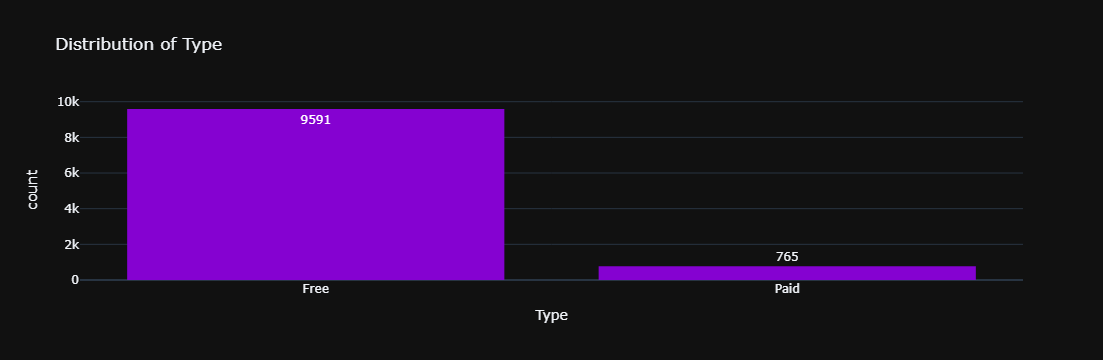

In [129]:
px.histogram(df, x='Type', color_discrete_sequence=['#8502d1'],text_auto =True,
             title='Distribution of Type' ,template='plotly_dark' )

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Price    </div>

In [132]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [134]:
def fix_price(x):
    try:
        if x.startswith('$'):
            return float(x[1:])
        else:
            return 0.0
    except:
        return np.nan
    
df['Price'] = df['Price'].apply(fix_price)

In [136]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Content Rating    </div>

In [139]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [140]:
def fix_Content(c):
    try:
        if c == 'Mature 17+':
            return 'Adults only 18+'
        else : 
            return c
    except:
        return c
    
df['Content Rating'] = df['Content Rating'].apply(fix_Content)

In [143]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Adults only 18+     450
Everyone 10+        377
Unrated               2
Name: count, dtype: int64

In [144]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6843,Best CG Photography,FAMILY,4.187877,1,2.5,500,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
7795,DC Universe Online Map,TOOLS,4.100000,1186,6.4,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [145]:
df.drop([6843 , 7795] , axis = 0 , inplace = True)

In [149]:
# Reset index 
df.reset_index(drop = True , inplace = True)

In [151]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8382
Teen               1146
Adults only 18+     450
Everyone 10+        377
Name: count, dtype: int64

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">    Fix Android Ver  </div>

In [156]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             894
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           278
2.2 and up             239
3.0 and up             236
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [158]:
def is_version4(v):
    try:
        if v == 'Varies with device' or v.startswith('4'):
            return 'yes'
        else:
            return 'no'
    except:
        return np.nan
    
df['is_version4']=df['Android Ver'].apply(is_version4)

In [160]:
df['is_version4'].value_counts()

is_version4
yes    7918
no     2435
Name: count, dtype: int64

In [162]:
df['is_version4'].isna().sum()

2

In [164]:
df['is_version4'] = df['is_version4'].fillna(df['is_version4'].mode())

# <div style="font-family: Trebuchet MS; background-color: #002699 ; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Analyzing the data by asking some key questions.  </div>



### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   What is the most expensive app on the store.?  </div>

In [168]:
df['Price'].max()

400.0

In [170]:
df[df['Price'] == 400.0]['App']

3913    I'm Rich - Trump Edition
Name: App, dtype: object

**The most expensive app on the store is " I'm Rich - Trump Edition "**

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Which Genre has more apps?   </div>

In [174]:
# Count the number of apps for each Genre
genre_counts = df['Genres'].value_counts(ascending=False)
genre_counts

Genres
Tools                                841
Entertainment                        587
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

**The Genre with the most apps is "Tools" with 841 apps.**

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   What is the average size of the free apps & paid apps?  </div>

In [178]:
# Type = free

df[df['Type'] == 'Free']['Size'].mean()

22.11789098285225

In [180]:
# Type = paid

df[df['Type'] == 'Paid']['Size'].mean()

21.36154359191618

**The average size of free apps is :  22  and paid apps is :  21**

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  What is the 5 top expenisve apps that has rate of 5?   </div>

In [184]:
# Filter for apps with a rating of 5
rate_5 = df[df['Rating'] == 5]

In [186]:
# Sort the filtered DataFrame by Price in descending order
sorted_df = rate_5.sort_values(by='Price', ascending=False)

In [188]:
# Select the top 5 expensive apps
top_5_expensive = sorted_df.head(5)
top_5_expensive

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_version4
5033,AP Art History Flashcards,FAMILY,5.0,1,96.000000,10,Paid,29.99,Adults only 18+,Education,"January 19, 2016",3.30,4.0 and up,yes
7007,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40.000000,10,Paid,19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up,no
4790,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.000000,10,Paid,4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up,no
5026,meStudying: AP English Lit,FAMILY,5.0,1,22.058607,10,Paid,4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,no
6735,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27.000000,100,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,yes


### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   How many apps that has more than 50K reviews?  </div>

In [191]:
count_apps = df[df['Reviews'] > 50000]['App'].count()
count_apps 

2525

**There are 2525 apps with more than 50K reviews.**

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   What is the average price of the apps for each genre with each installs numbers?  </div>

In [195]:
# Group by both 'Genre' and 'Installs' and calculate the mean price
avg_price_df = df.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()

In [197]:
# Optionally, rename the column for clarity
avg_price_df.rename(columns={'Price': 'Average Price'}, inplace=True)

In [199]:
# Display the result
avg_price_df

,Genres,Installs,Average Price
0,Action,10,0.000000
1,Action,50,0.663333
2,Action,100,1.096000
3,Action,500,0.000000
4,Action,1000,0.372500
...,...,...,...
916,Word,100000,0.000000
917,Word,1000000,0.000000
918,Word,5000000,0.000000
919,Word,10000000,0.000000


### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   How many apps have rating > 4.7 and what is thier avg price?  </div>

In [202]:
# how many apps have rating > 4.7

df[df['Rating'] > 4.7]['App'].count()

586

In [204]:
# and what is the average price 

df[df['Rating'] > 4.7]['Price'].mean()

0.455

**The apps that have Rating > 4.7 are 586 with average price : 0.455**

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   How much google earned from the 5,000,000+ installed apps?  </div>

In [208]:
# Filter for apps with at least 5,000,000 installs
df_5M = df[df['Installs'] >= 5000000]

In [210]:
# Consider only paid apps (where Price > 0)
df_5M_paid = df_5M[df_5M['Price'] > 0].copy()
df_5M_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,is_version4
1983,Minecraft,FAMILY,4.5,2376564,22.058607,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,yes
3587,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Adults only 18+,Action,"July 12, 2018",1.7.110758,4.1 and up,yes
3893,Minecraft,FAMILY,4.5,2375336,22.058607,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,yes


In [212]:
# Calculate estimated revenue per app: Price * number of installs
df_5M_paid['revenue'] = df_5M_paid['Price'] * df_5M_paid['Installs']

In [214]:
# Sum the revenues to get the total estimated revenue
total_revenue = df_5M_paid['revenue'].sum()
total_revenue

149700000.0

**Estimated total revenue from apps with 5,000,000+ installs: $149,700,000**

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   What is the max and min size for free and paid apps?  </div>

In [218]:
# for free

df[df['Type'] == 'Free']['Size'].max()   # max free


100.0

In [220]:
df[df['Type'] == 'Free']['Size'].min()     # min free

1.0

In [222]:
# for paid

df[df['Type'] == 'Paid']['Size'].max()    # max paid

100.0

In [224]:
df[df['Type'] == 'Paid']['Size'].min()      # min paid

1.0

**for free and paid apps is the same: the Max Size is : 100 and Min Size is : 1**

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   Is there a correlation between rating, Reviews, Size with the price of the app?  </div>

In [228]:
# Calculate the correlation matrix
correlation_matrix = df[['Rating', 'Reviews', 'Size', 'Price']].corr()
correlation_matrix

,Rating,Reviews,Size,Price
Rating,1.000000,0.068601,0.065374,-0.020601
Reviews,0.068601,1.000000,0.129858,-0.009419
Size,0.065374,0.129858,1.000000,-0.022532
Price,-0.020601,-0.009419,-0.022532,1.000000


**Rating vs Price (-0.0206):**
This near-zero value means there's almost no linear relationship between the app's rating and its price.

**Reviews vs Price (-0.0094):**
Similarly, the number of reviews has virtually no correlation with the price.

**Size vs Price (-0.0225):**
The app size also shows a negligible correlation with price.

### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">   How many apps for each type for each content reading?  </div>

In [232]:
# Group by 'Type' and'Content Rating' and count the occurrences
app_counts = df.groupby(['Content Rating']).size().reset_index(name='Count')
app_counts

,Content Rating,Count
0,Adults only 18+,450
1,Everyone,8382
2,Everyone 10+,377
3,Teen,1146


### <div style="font-family: Trebuchet MS; background-color: #1a53ff ; color: #FFFFFF; padding: 12px; line-height: 1.5;">  How many apps that can work on android version 4?   </div>

In [235]:
df[df['is_version4'] == 'yes']['App'].count()

7918

**Number of apps that can work on Android version 4:   7918**

# Thanks 